In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

project_home = '/data/perlman/moochie/user_data/CamachoCat/combinedDWI'
out_dir = project_home + '/network_analysis/ENET_results/'

topnets = ['visual_visual', 'frontoparietal_somatomotor'] #from elastic net results
sxs = ['CBCL_internT','CBCL_externT'] # from preregistration

#combine data into one dataframe called full_data
sample_data = pd.read_csv(out_dir + 'full_sample_connectivity.csv', index_col=None)
stress_data = pd.read_csv(out_dir + 'labeling_results.csv',index_col=0)
sxs_data = pd.read_csv('/data/perlman/moochie/user_data/ChinJenna/StressNeurodev/scored_data/cbcl_tscores.csv')
full_data = sample_data.merge(stress_data,on='ID')
full_data = full_data.merge(sxs_data, on='ID')

#convert variables of interest that are not already centered (network and CBCL measures)
sc = StandardScaler()
for x in topnets + sxs + ['scan_age']:
    full_data[x +'_std'] = sc.fit_transform(full_data[x].to_numpy().reshape(-1,1))
    
full_data.describe()

,ID,default_default,default_dorsatt,default_frontoparietal,default_limbic,default_somatomotor,default_ventatt,default_visual,dorsatt_dorsatt,dorsatt_frontoparietal,...,LEQ_tot_neg_predicted,LEQ_wprox_tot_neg_yj,LEQ_wprox_tot_neg_predicted,CBCL_internT,CBCL_externT,visual_visual_std,frontoparietal_somatomotor_std,CBCL_internT_std,CBCL_externT_std,scan_age_std
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,...,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.000000,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01,9.600000e+01
mean,224.645833,7.298709,8.001462,7.487235,8.199385,7.296564,7.193619,7.928173,8.293374,7.844722,...,2.151057e-16,-3.700743e-17,1.087093e-16,48.062500,49.354167,1.050086e-15,1.600572e-15,-4.625929e-17,2.960595e-16,-5.551115e-16
std,360.452960,0.610758,0.720195,0.644715,0.827409,0.629164,0.622399,0.689187,0.902468,0.781919,...,1.581191e-01,1.005249e+00,1.654385e-01,9.595846,9.209811,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00,1.005249e+00
min,2.000000,5.673226,6.016103,5.501841,6.270526,5.522540,5.472724,6.076996,5.793200,5.505137,...,-4.024809e-01,-1.477688e+00,-4.394469e-01,33.000000,28.000000,-2.492249e+00,-2.537156e+00,-1.577930e+00,-2.330804e+00,-1.919774e+00
25%,38.750000,6.915923,7.625370,7.130479,7.701703,6.961426,6.827213,7.457978,7.765810,7.406928,...,-1.137664e-01,-5.850133e-01,-1.138287e-01,41.000000,44.000000,-5.106593e-01,-7.232535e-01,-7.398591e-01,-5.844064e-01,-8.672856e-01
50%,72.500000,7.321090,8.040709,7.500644,8.263840,7.262372,7.224309,7.902920,8.339578,7.922353,...,-5.339976e-04,8.755755e-02,-3.760612e-03,48.000000,48.500000,-1.114957e-01,2.918133e-03,-6.547425e-03,-9.323216e-02,-5.374150e-02
75%,119.250000,7.744375,8.478653,7.935320,8.697210,7.755994,7.599281,8.391817,8.838762,8.357578,...,1.072363e-01,7.569212e-01,1.092414e-01,54.000000,54.500000,6.927980e-01,6.898743e-01,6.220054e-01,5.616669e-01,9.857871e-01
max,1053.000000,8.717932,9.930423,8.898820,10.298348,8.874980,8.457362,9.904871,10.715065,9.599827,...,3.982991e-01,1.960987e+00,4.858337e-01,67.000000,77.000000,3.571206e+00,2.468979e+00,1.983870e+00,3.017538e+00,1.849171e+00


## Associations between stress, network connectivity, and internalizing symptomology
This cell plots distributions of and runs pair-wise correlations between each variable of interest.

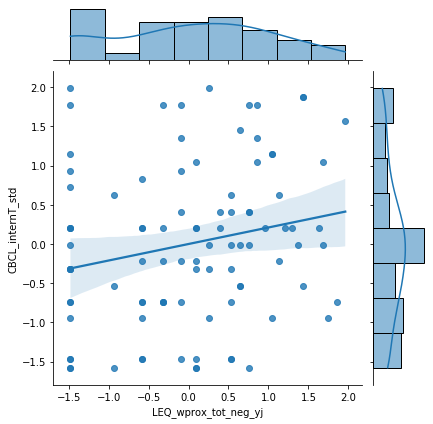

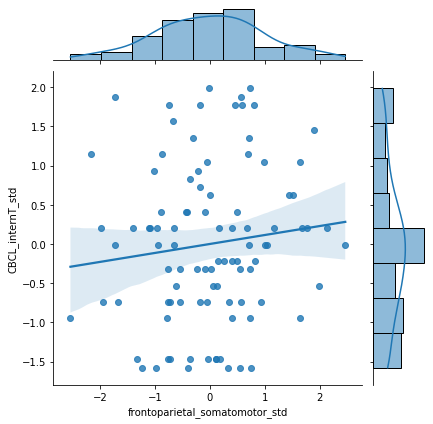

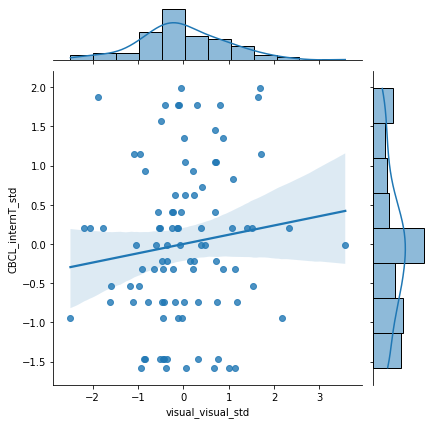

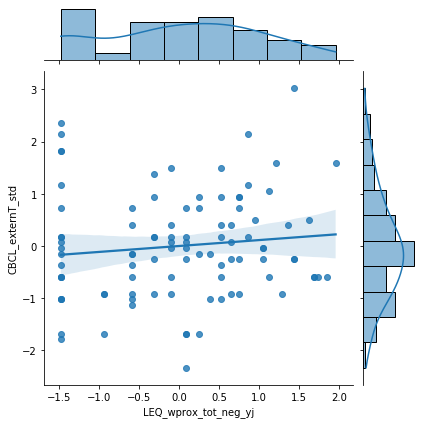

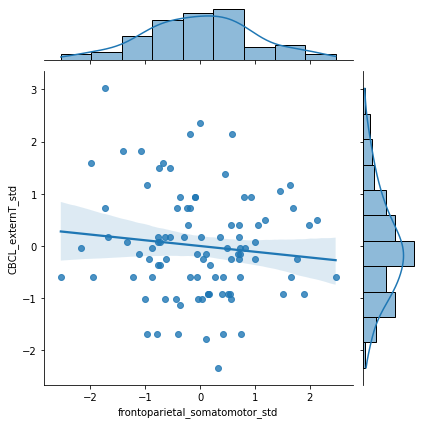

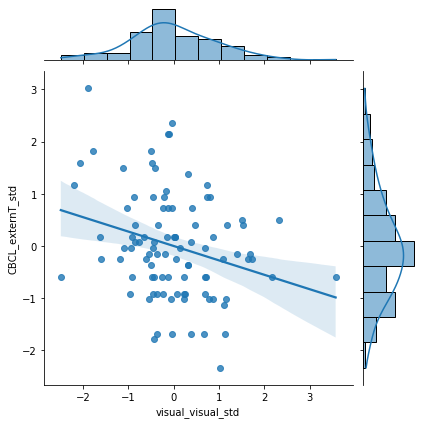

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='LEQ_wprox_tot_neg_yj', y='CBCL_internT_std', data=full_data,kind='reg')
sns.jointplot(x='frontoparietal_somatomotor_std', y='CBCL_internT_std', data=full_data,kind='reg')
sns.jointplot(x='visual_visual_std', y='CBCL_internT_std', data=full_data,kind='reg')

sns.jointplot(x='LEQ_wprox_tot_neg_yj', y='CBCL_externT_std', data=full_data,kind='reg')
sns.jointplot(x='frontoparietal_somatomotor_std', y='CBCL_externT_std', data=full_data,kind='reg')
sns.jointplot(x='visual_visual_std', y='CBCL_externT_std', data=full_data,kind='reg')

In [40]:
from scipy.stats import spearmanr

sxs = ['CBCL_internT_std','CBCL_externT_std']
for s in sxs:
    x_vars = ['scan_age','LEQ_wprox_tot_neg_yj'] + topnets
    for x in x_vars:
        spear_r, spear_p = spearmanr(full_data[s], full_data[x])
        if spear_p <0.05:
            flag = '*'
        else:
            flag=''
        print('Spearman corr between {0} and {1} r={2}, p={3}{4}'.format(s,x,round(spear_r,2),round(spear_p,3),flag))

Spearman corr between CBCL_internT_std and scan_age r=-0.06, p=0.58
Spearman corr between CBCL_internT_std and LEQ_wprox_tot_neg_yj r=0.23, p=0.025*
Spearman corr between CBCL_internT_std and visual_visual r=0.15, p=0.155
Spearman corr between CBCL_internT_std and frontoparietal_somatomotor r=0.12, p=0.257
Spearman corr between CBCL_externT_std and scan_age r=-0.01, p=0.896
Spearman corr between CBCL_externT_std and LEQ_wprox_tot_neg_yj r=0.14, p=0.167
Spearman corr between CBCL_externT_std and visual_visual r=-0.24, p=0.018*
Spearman corr between CBCL_externT_std and frontoparietal_somatomotor r=-0.06, p=0.554


In [54]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

pvals = []
for net in topnets:
    print('****************************************************************')
    print('************************* {0} ***********************'.format(net))
    print('****************************************************************')
    model = smf.glm('CBCL_internT_std ~  male + scan_age',data=full_data)
    model = model.fit()
    print(model.summary())
    
    model = smf.mixedlm('CBCL_internT_std ~ LEQ_wprox_tot_neg_yj + {0}'.format(net), groups='male',data=full_data)
    model= model.fit()
    print(model.summary())
    
    model = smf.mixedlm('CBCL_internT_std ~ LEQ_wprox_tot_neg_yj + {0} + LEQ_wprox_tot_neg_yj*{0}'.format(net), groups='male',data=full_data)
    model= model.fit()
    print(model.summary())
    print('\n\n')

****************************************************************
************************* visual_visual ***********************
****************************************************************
                 Generalized Linear Model Regression Results                  
Dep. Variable:       CBCL_internT_std   No. Observations:                   96
Model:                            GLM   Df Residuals:                       93
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          1.0300
Method:                          IRLS   Log-Likelihood:                -136.11
Date:                Fri, 23 Oct 2020   Deviance:                       95.792
Time:                        11:21:14   Pearson chi2:                     95.8
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                

/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2170: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warni

                          Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          CBCL_internT_std
No. Observations:           96               Method:                      REML            
No. Groups:                 2                Scale:                       0.9922          
Min. group size:            42               Log-Likelihood:              -138.6419       
Max. group size:            54               Converged:                   No              
Mean group size:            48.0                                                          
------------------------------------------------------------------------------------------
                                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------------------------------
Intercept                                       -0.677    1.101 -0.615 0.539 -2.835  1.481
LEQ_wprox_tot_neg_yj      

/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/data/perlman/moochie/resources/mri_scripts/mri_proc_env/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2112: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/data/perlman/moochie/resources/mri_scr